In [198]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
Data = { 
    'x': [22,37,42,41,29,34,40,32,38,40,16,11,9,25,4,33,49,50,45,37], 
    'y' : [62,55,79,45,37,72,54,39,66,78,43,31,40,47,6,13,49,56,75,72]
       }

In [200]:
X = Data['x']
Y = Data['y']

Text(0, 0.5, 'y')

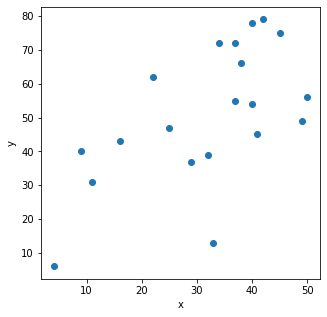

In [201]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel("x")
plt.ylabel("y")

In [202]:
#function to select random  points to be centroids
import random
def select_centroids(noc,training_set_size):
    x_point = []
    y_point = []
    for i in range(noc):
        j = random.randint(1,training_set_size-1)
        
        x_point.append(X[j])
        y_point.append(Y[j])
        
    centroids = {"x":x_point,"y":y_point}
    return centroids

In [203]:
noc = 3
centroids = select_centroids(noc,len(X))

print(centroids)

{'x': [37, 40, 29], 'y': [72, 54, 37]}


Text(0, 0.5, 'y')

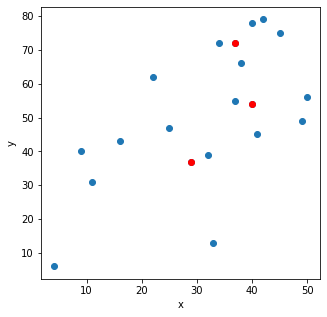

In [204]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.scatter(centroids["x"],centroids["y"],color = "red")
plt.xlabel("x")
plt.ylabel("y")

In [205]:
#finding distance of each point
import math
def find_distance(x1,y1,x2,y2):
    dist = math.sqrt(((x1-x2)**2)+((y1-y2)**2))
    return dist

In [206]:
#finding distance of each point from centroid
def find_dist_from_centroids(centroids,point_x,point_y):
    distance = []
    centroids_distance = {}
    for i in range(len(centroids['x'])):
        for j in range(len(X)):
            distance.append(find_distance(centroids['x'][i],centroids['y'][i],point_x[i],point_y[j]))
        centroids_distance[i] = distance
        distance = []
    return centroids_distance

In [207]:
#calculating mean distance of each cluster point
def mean_distance(df,x,y):
    m = df.groupby("cluster").mean()[["x","y"]]
    return m

In [208]:
#KMeans Function
def kmeans(centroids,x,y):
    diff = 1;
    i = 0
    while(diff!=0):
        centroids_distance = find_dist_from_centroids(centroids,x,y)
        df = pd.DataFrame()
        df.iloc[0:0]
        df = pd.DataFrame(find_dist_from_centroids(centroids,X,y))
        df['cluster'] = df.idxmin(axis = 1)
        df["x"]=x
        df["y"]=y
        new_centroids = mean_distance(df,x,y)
        diff = ((new_centroids["x"]-centroids["x"]).sum()) + ((new_centroids["y"]-centroids["y"]).sum())
        print(diff)
        centroids = new_centroids
        i+=1
    return df

-18.533333333333324
-28.974358974358978
0.0


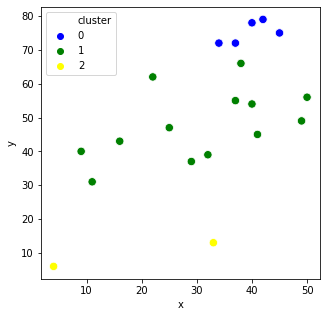

In [209]:
#plotting final clustering
df_new = kmeans(centroids,X,Y)
plt.figure(figsize=(5,5))
sns.scatterplot(df_new['x'],df_new['y'],hue=df_new['cluster'],palette=["blue","green","yellow"],s = 70)